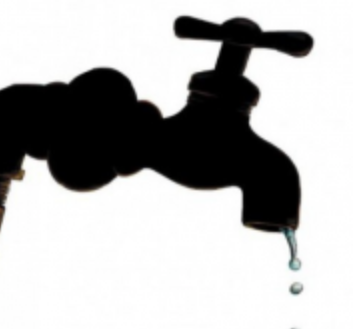

image from https://www.kingsnews.org/articles/the-consequence-of-water-supply--demand-gap

Water supply is critical and how we can improve it is very important. But there are gap between not only countries but also urban and rural. So I tried finding how the gap occurs.

1.Data Importing and Preprocessing

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
%matplotlib inline

import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/kaggle/input/unicef-drinking-water-databasee/Drinking-Water-Database-June-2015_75.csv')

In [ ]:
df.head(10)

In [ ]:
df=df.rename(columns={'Unnamed: 0': 'Country_code', 'Unnamed: 1': 'Country',
                     'Unnamed: 2':'Year','Unnamed: 3':'Urban_total_improved',
                     'Unnamed: 4':'Urban_piped_on_premised','Unnamed: 5':'Urban_other_improved',
                     'Unnamed: 6':'Urban_other_unimproved','Unnamed: 7':'Urban_surfacewater',
                      'Unnamed: 8':'Rural_total_improved',
                     'Unnamed: 9':'Rural_piped_on_premised','Unnamed: 10':'Rural_other_improved',
                     'Unnamed: 11':'Rural_other_unimproved','Unnamed: 12':'Rural_surfacewater',
                      'Unnamed: 13':'Total_total_improved',
                     'Unnamed: 14':'Total_piped_on_premised','Unnamed: 15':'Total_other_improved',
                     'Unnamed: 16':'Total_other_unimproved','Unnamed: 17':'Total_surfacewater'
                     })

In [ ]:
df=df.drop(range(8))

In [ ]:
df=df[:-10]

In [ ]:
df.head(10)

In [ ]:
df.info()

In [ ]:
df=df.replace('-', 'NaN')

In [ ]:
df=df.astype({'Urban_total_improved': float, 'Urban_piped_on_premised': float,'Urban_other_improved':float,
              'Urban_other_unimproved':float,'Urban_surfacewater':float,'Rural_total_improved':float,
              'Rural_piped_on_premised':float,'Rural_other_improved':float,'Rural_other_unimproved':float,
              'Rural_surfacewater':float,'Total_total_improved':float,'Total_piped_on_premised':float,
              'Total_other_improved':float,'Total_other_unimproved':float,'Total_surfacewater':float
             })

In [ ]:
df.info()

In [ ]:
df= df.sort_values('Year', ascending=True)
df=df.dropna(subset=['Year'])
df=df.dropna(subset=['Country_code'])

In [ ]:
df.describe()

2.Global Mapping of 'Total Improvement', 'Urban Improvement' and 'Rural Improvement'

In [ ]:
fig = px.choropleth(df,locations='Country_code',color='Total_total_improved',scope='world',color_continuous_scale=px.colors.sequential.GnBu,
                    animation_frame='Year',range_color=(0,100),title='Water Improvement',height=800
    )
fig.show()

In [ ]:
fig = px.choropleth(df,locations='Country_code',color='Urban_total_improved',scope='world',color_continuous_scale=px.colors.sequential.GnBu,
                    animation_frame='Year',range_color=(0,100),title='Urban Water Improvement',height=800
    )
fig.show()

In [ ]:
fig = px.choropleth(df,locations='Country_code',color='Rural_total_improved',scope='world',color_continuous_scale=px.colors.sequential.GnBu,
                    animation_frame='Year',range_color=(0,100),title='Rural Water Improvement',height=800
    )
fig.show()

In some countries in Africa, there are gap of water improvement between urban and rural.

3.Urban and Rural Improvement Scatterplot in 1990 and 2015

In [ ]:
df_2015=df[df['Year']=='2015']
df_2015= df_2015.sort_values('Country', ascending=True)
df_1990=df[df['Year']=='1990']
df_1990= df_1990.sort_values('Country', ascending=True)

In [ ]:
plt.figure(figsize = (10,10))
p=sns.scatterplot(data=df_1990, x='Urban_total_improved', y='Rural_total_improved')
p.set(title = "Water Improvement in 1990")

In [ ]:
plt.figure(figsize = (10,10))
p=sns.scatterplot(data=df_2015, x='Urban_total_improved', y='Rural_total_improved')
p.set(title = "Water Improvement in 2015")

We can find from above scatterplot that improvement of water has been focused on urban area mainly.

4.Scatterplot of Total, Urban and Rural improvement by countries in 1990

In [ ]:
plt.figure(figsize=(10, 50))
plt.legend(fontsize=10)
plt.tick_params(labelsize=10)
ax=sns.scatterplot(x=df_1990['Total_total_improved'],y=df_1990['Country'],hue=df_1990['Rural_total_improved'],size=df_1990['Urban_total_improved'],data=df_1990,sizes=(1,200))
plt.xticks(rotation=90)
ax.legend(loc='upper left',bbox_to_anchor=(1,1))

5.Scatterplot of Total, Urban and Rural improvement by countries in 2015

In [ ]:
plt.figure(figsize=(10, 50))
plt.legend(fontsize=10)
plt.tick_params(labelsize=10)
ax=sns.scatterplot(x=df_2015['Total_total_improved'],y=df_2015['Country'],hue=df_2015['Rural_total_improved'],size=df_2015['Urban_total_improved'],data=df_2015,sizes=(1,200))
plt.xticks(rotation=90)
ax.legend(loc='upper left',bbox_to_anchor=(1,1))

6.Correlation heatmap in 1990 and 2015

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(df_1990.corr(),annot=True,fmt="1.1f")

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(df_2015.corr(),annot=True,fmt="1.1f")

I think that I can split countries into some clusters.

7.Clustering by PyCaret

In [ ]:
pip install pycaret --ignore-installed llvmlite numba

In [ ]:
from pycaret.clustering import *

In [ ]:
clu = setup(df_2015,silent=True,session_id=1)

1)Modeling

In [ ]:
kmeans = create_model('kmeans',num_clusters=4)

In [ ]:
plot_model(kmeans, 'elbow')

In [ ]:
plot_model(kmeans)

In [ ]:
plot_model(kmeans, plot = 'silhouette')

In [ ]:
kmeans_df = assign_model(kmeans)
kmeans_df.head(5)

In [ ]:
plot_model(kmeans,'distribution')

2)I tried finding the features of each clusters

In [ ]:
kmeans_df.groupby('Cluster').mean().T

In [ ]:
sns.violinplot(x='Cluster', y='Total_total_improved', data=kmeans_df)
plt.show()

In [ ]:
sns.violinplot(x='Cluster', y='Urban_total_improved', data=kmeans_df)
plt.show()

In [ ]:
sns.violinplot(x='Cluster', y='Rural_total_improved', data=kmeans_df)
plt.show()

In this notebook, I can find 4 categories (clusters) in which water improvemnet has been done.
* 1st stage: In this stage, main improvement of water is done in 'other' than piped_on_premised. It means that the development and improvement of piped_on_premised is running late. And water improvement in rural area is also running late compared to that in urban area. And how we can develop the tech for the surface water is also important.
* 2nd stage: In urban area, improvemnet of piped_on_premised is getting better. But in rural area, main improvement of water is still done in 'other' than piped_on_premised.
* 3rd stage: In urban area, main improvement of water is done in piped_on_premised. And in rural area, improvemnet of piped_on_premised is getting better.
* 4th stage: In both area, urban and rural,main improvement of water is done in piped_on_premised.


So we have some gap between urban and rural in water improvement.